## Introduction
This project is a public health project which the task is to use the data to 
generate insights on the factors that affect the spread of HIV and AIDS through sexual intercourse. The data was as a csv file downloaded from kaggle. 
the project is entirely a personal work to help build my data analytics proficiency with python libraries such as pandas, numpy, 
seaborn and matplotlib.pyplot.
the csv file contains 9 columns which have the following header names: Age, Marital Status, STD, Educational Background, 
HIV test in past year, AIDS Education, places of seeking sexual Partners, Sexual Orientation and Result (HIV status)

# Objectives

## 1. Age Group

(a) What is the most common age group for individuals who tested positive for HIV in the past year?

(b) How does age correlate with the likelihood of having received AIDS education?


## 2. Marital Status

(a) Which marital status group shows the highest prevalence of STDs?

(b) What is the relationship between marital status and the frequency of HIV testing in the past year?

## 3. STD (Sexually Transmitted Diseases)

(a) Which STD is most commonly reported among individuals with different educational backgrounds?

(b) Is there a significant difference in the prevalence of STDs between different sexual orientations?


## 4. Educational Background

(a) How does educational background affect the awareness and knowledge of AIDS?

(b)What educational background is most associated with drug-taking behaviors?

## 5. HIV Test in Past Year

(a) What percentage of individuals tested for HIV in the past year were found to be HIV positive?

(b) How does the frequency of HIV testing vary with places of seeking sex partners?

## 6. AIDS Education

 What impact does AIDS education have on the likelihood of individuals seeking HIV testing?



# 7. Places of Seeking Sex Partners

 What are the most common places of seeking sex partners among individuals who tested positive for STDs?


# 8. Sexual Orientation

 What is the distribution of sexual orientations among individuals who received AIDS education?



# 9. Result (HIV Status)

(a) What is the correlation between educational background and HIV status?

(b) How does marital status affect the outcome of HIV test results?


In [1]:
#import all the required libraries for the project
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\ASUS\\Documents\\data_bank\\HIV_dataset.csv")

In [3]:
df

,Age,Marital Staus,STD,Educational Background,HIV TEST IN PAST YEAR,AIDS education,Places of seeking sex partners,SEXUAL ORIENTATION,Drug- taking,Result
0,22,UNMARRIED,NO,College Degree,YES,NO,Bar,Heterosexual,YES,POSITIVE
1,20,UNMARRIED,NO,College Degree,NO,YES,None,Heterosexual,NO,NEGATIVE
2,23,Married,YES,College Degree,NO,YES,None,Bisexual,NO,NEGATIVE
3,24,Married,NO,College Degree,YES,YES,Park,Heterosexual,YES,POSITIVE
4,18,UNMARRIED,YES,Senior High School,YES,NO,Internet,Heterosexual,YES,POSITIVE
...,...,...,...,...,...,...,...,...,...,...
693,19,UNMARRIED,YES,Illiteracy,NO,NO,Internet,Heterosexual,NO,POSITIVE
694,47,MARRIED,NO,College Degree,NO,YES,Bar,Bisexual,NO,NEGATIVE
695,34,UNMARRIED,YES,Senior High School,YES,YES,Park,Homosexual,YES,NEGATIVE
696,25,MARRIED,NO,Junior High School,NO,NO,Public Bath,Heterosexual,YES,POSITIVE


## data quality assessment and wrangling:

we take care of 1. null values (if any), 2. check and eliminate wrong values, 3. check for and eliminate duplicate values and 4. change wrong datatype format

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             698 non-null    int64 
 1   Marital Staus                   698 non-null    object
 2   STD                             698 non-null    object
 3   Educational Background          698 non-null    object
 4   HIV TEST IN PAST YEAR           698 non-null    object
 5   AIDS education                  698 non-null    object
 6   Places of seeking sex partners  698 non-null    object
 7   SEXUAL ORIENTATION              698 non-null    object
 8   Drug- taking                    698 non-null    object
 9   Result                          698 non-null    object
dtypes: int64(1), object(9)
memory usage: 54.7+ KB


In [5]:
df.describe()

,Age
count,698.000000
mean,40.022923
std,18.154906
min,12.000000
25%,25.000000
50%,38.000000
75%,54.000000
max,80.000000


## Checking for null values

In [6]:
df.isna().sum()

Age                               0
Marital Staus                     0
STD                               0
Educational Background            0
HIV TEST IN PAST YEAR             0
AIDS education                    0
Places of seeking sex partners    0
SEXUAL ORIENTATION                0
Drug- taking                      0
Result                            0
dtype: int64

the data does not contain empty space (null values). However, we will still check for inconsistencies such as wrong entries and duplicates of data

## checking for wrong values/entries for each of the columns

In [7]:
df["Age"].unique()

array([22, 20, 23, 24, 18, 15, 70, 44, 13, 19, 25, 75, 50, 76, 34, 45, 56,
       27, 29, 40, 78, 16, 26, 37, 12, 67, 21, 30, 71, 80, 35, 68, 17, 38,
       46, 42, 41, 28, 64, 69, 73, 14, 49, 43, 47, 39, 36, 31, 32, 79, 57,
       51, 48, 33, 59, 62, 54, 52, 61, 58, 53, 60, 65, 66, 55],
      dtype=int64)

In [8]:
#rename the column "Marital Staus" to "Marital Status"
df= df.rename(columns={"Marital Staus":"Marital Status"})

In [9]:
df.head()

,Age,Marital Status,STD,Educational Background,HIV TEST IN PAST YEAR,AIDS education,Places of seeking sex partners,SEXUAL ORIENTATION,Drug- taking,Result
0,22,UNMARRIED,NO,College Degree,YES,NO,Bar,Heterosexual,YES,POSITIVE
1,20,UNMARRIED,NO,College Degree,NO,YES,None,Heterosexual,NO,NEGATIVE
2,23,Married,YES,College Degree,NO,YES,None,Bisexual,NO,NEGATIVE
3,24,Married,NO,College Degree,YES,YES,Park,Heterosexual,YES,POSITIVE
4,18,UNMARRIED,YES,Senior High School,YES,NO,Internet,Heterosexual,YES,POSITIVE


In [10]:
df["Marital Status"].unique()

array(['UNMARRIED', 'Married', 'MARRIED', 'Widowed', 'Divorced',
       'Cohabiting', 'DIvorced'], dtype=object)

The element options in the Marital Status column is not consistent, we use a consistent way to store them to reduce the repetition

In [11]:
#Capitalize the elements in the column
df["Marital Status"] = df["Marital Status"].str.capitalize()

In [12]:
df["Marital Status"].unique()

array(['Unmarried', 'Married', 'Widowed', 'Divorced', 'Cohabiting'],
      dtype=object)

In [13]:
df["STD"].unique()

array(['NO', 'YES', 'No', 'Yes'], dtype=object)

The element options in the STD column is not consistent, we use a consistent way to store them to reduce the repetition

In [14]:
#Capitalize the elements in the column
df["STD"]= df["STD"].str.capitalize()

In [15]:
df["STD"].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
df["Educational Background"].unique()

array(['College Degree', 'Senior High School', 'Junior High School',
       'Illiteracy', 'Primary School', 'College Dregree'], dtype=object)

In [17]:
#replace wrong entries('College Dregree') with the right entries('College Degree')
df["Educational Background"]= df["Educational Background"].replace({"College Dregree":"College Degree"})

In [18]:
df["Educational Background"].unique()

array(['College Degree', 'Senior High School', 'Junior High School',
       'Illiteracy', 'Primary School'], dtype=object)

In [19]:
df["HIV TEST IN PAST YEAR"]= df["HIV TEST IN PAST YEAR"].str.capitalize()

In [20]:
df["HIV TEST IN PAST YEAR"].unique()

array(['Yes', 'No'], dtype=object)

In [21]:
df["AIDS education"].unique()

array(['NO', 'YES', 'No', 'Yes'], dtype=object)

In [22]:
#working capitalized case
df["AIDS education"]= df["AIDS education"].str.capitalize()

In [23]:
df["AIDS education"].unique()

array(['No', 'Yes'], dtype=object)

In [24]:
df["Places of seeking sex partners"].unique()

array(['Bar', 'None', 'Park', 'Internet', 'Public bath', 'Public Bath',
       'Others'], dtype=object)

In [25]:
df["Places of seeking sex partners"]= df["Places of seeking sex partners"].str.capitalize()

In [26]:
df["Places of seeking sex partners"].unique()

array(['Bar', 'None', 'Park', 'Internet', 'Public bath', 'Others'],
      dtype=object)

In [27]:
df["SEXUAL ORIENTATION"].unique()

array(['Heterosexual', 'Bisexual', 'Homosexual', 'Hetersexual',
       'BIsexual'], dtype=object)

In [28]:
#replace wrong data entry spellings with correct spelling
df["SEXUAL ORIENTATION"]= df["SEXUAL ORIENTATION"].replace({"Hetersexual":"Heterosexual","BIsexual":"Bisexual"})

In [29]:
df["SEXUAL ORIENTATION"].unique()

array(['Heterosexual', 'Bisexual', 'Homosexual'], dtype=object)

In [30]:
df["Drug- taking"].unique()

array(['YES', 'NO', 'No', 'Yes'], dtype=object)

In [31]:
#working capitalized case
df["Drug- taking"]= df["Drug- taking"].str.capitalize()

In [32]:
df["Drug- taking"].unique()

array(['Yes', 'No'], dtype=object)

In [33]:
df["Result"].unique()

array(['POSITIVE', 'NEGATIVE', 'Positive', 'Negative'], dtype=object)

In [34]:
df["Result"]= df["Result"].str.capitalize()

In [35]:
df["Result"].unique()

array(['Positive', 'Negative'], dtype=object)

## checking for dulicates

In [36]:
df[df.duplicated(keep=False)]

,Age,Marital Status,STD,Educational Background,HIV TEST IN PAST YEAR,AIDS education,Places of seeking sex partners,SEXUAL ORIENTATION,Drug- taking,Result
0,22,Unmarried,No,College Degree,Yes,No,Bar,Heterosexual,Yes,Positive
1,20,Unmarried,No,College Degree,No,Yes,None,Heterosexual,No,Negative
2,23,Married,Yes,College Degree,No,Yes,None,Bisexual,No,Negative
4,18,Unmarried,Yes,Senior High School,Yes,No,Internet,Heterosexual,Yes,Positive
7,15,Unmarried,No,Junior High School,Yes,No,Public bath,Bisexual,No,Positive
...,...,...,...,...,...,...,...,...,...,...
693,19,Unmarried,Yes,Illiteracy,No,No,Internet,Heterosexual,No,Positive
694,47,Married,No,College Degree,No,Yes,Bar,Bisexual,No,Negative
695,34,Unmarried,Yes,Senior High School,Yes,Yes,Park,Homosexual,Yes,Negative
696,25,Married,No,Junior High School,No,No,Public bath,Heterosexual,Yes,Positive


### 1 (a) What is the most common age group for individuals who tested positive for HIV in the past year?

In [37]:
age_group= df.groupby(["Age"])["Result"].count()
age_group

Age
12     4
13     6
14     4
15    40
16     8
      ..
75     6
76     6
78    12
79     4
80     6
Name: Result, Length: 65, dtype: int64

Text(0, 0.5, 'Frequency')

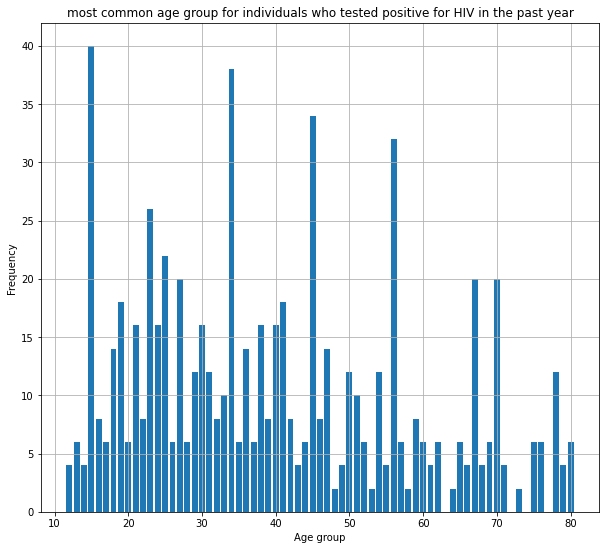

In [38]:
x= age_group.index
y= age_group.values
plt.figure(figsize=(10,9))
plt.grid(True)
plt.bar(x, y)
plt.title("most common age group for individuals who tested positive for HIV in the past year")
plt.xlabel("Age group")
plt.ylabel("Frequency")

Teenagers/young adults have the highest population for those that tested positive , then followed by those in their mid-30s and mid-20s. 
this implies that the virus is common with people in their active ages (young people). The most common age that tested positive is 15years.

<Figure size 720x576 with 0 Axes>

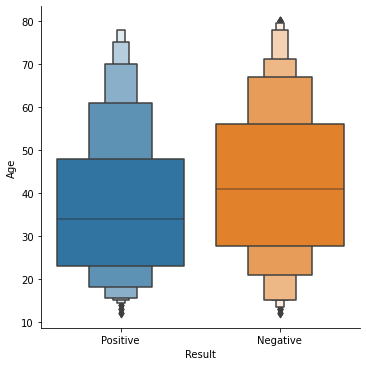

In [39]:
#plot a categorical plot of age and those who tested positive
plt.figure(figsize=(10,8))
sns.catplot(data=df, x="Result",y="Age", kind="boxen")

## 1(b) How does age correlate with the likelihood of having received AIDS education?

In [40]:
df.corr()

,Age
Age,1.0


In [41]:
# 1(b) How does age correlate with the likelihood of having received AIDS education?
df.groupby("AIDS education")["Age"].count()

AIDS education
No     413
Yes    285
Name: Age, dtype: int64

Text(0.5, 1.0, 'age correlate with the likelihood of having received AIDS education')

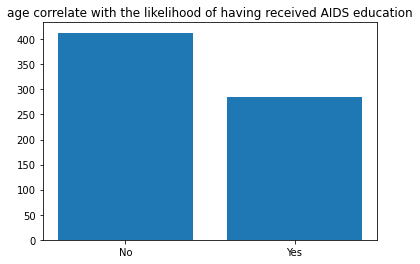

In [42]:
x= df.groupby("AIDS education")["Age"].count().index
y= df.groupby("AIDS education")["Age"].count().values
plt.bar(x,y)
plt.title("age correlate with the likelihood of having received AIDS education")

Generally,  the population for the ages of people with the likelihood of having recieved AIDS education is low 
as compared to those who have never recieved such education.

<Figure size 720x648 with 0 Axes>

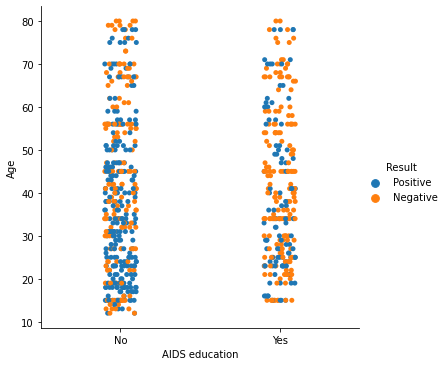

In [43]:
plt.figure(figsize=(10,9))
sns.catplot(data=df, x="AIDS education" , y="Age", hue="Result")

The observation above from seaborn the plot shows that the people who do not have AIDS education have a high population between the ages of 18 and 49, the lack of AIDS education also increases the posiblity for them to contract the virus. 
this implies that AIDS education plays a role to mitigate the statisics of those living with the virus.
However, generally it is observed that younger people have the propensity to contract the virus.

## 2(a) Which marital status group shows the highest prevalence of STDs?

In [44]:
df.groupby("Marital Status")["STD"].count()

Marital Status
Cohabiting     36
Divorced      102
Married       202
Unmarried     276
Widowed        82
Name: STD, dtype: int64

Text(0.5, 1.0, 'marital status group shows the highest prevalence of STDs')

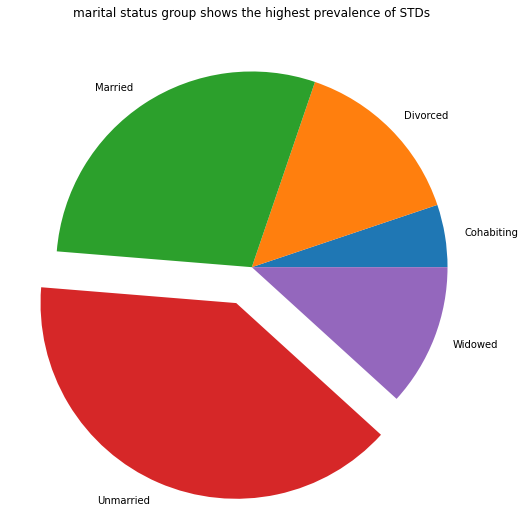

In [45]:
plt.figure(figsize=(10,9))
labels= df.groupby("Marital Status")["STD"].count().index
x= df.groupby("Marital Status")["STD"].count().values
plt.pie(x, labels=labels, explode=[0,0,0,0.2,0])
plt.title("marital status group shows the highest prevalence of STDs")

the highest prevalence of STDs is in the Umarried population

Text(0.5, 1.0, 'marital status group shows the highest prevalence of STDs')

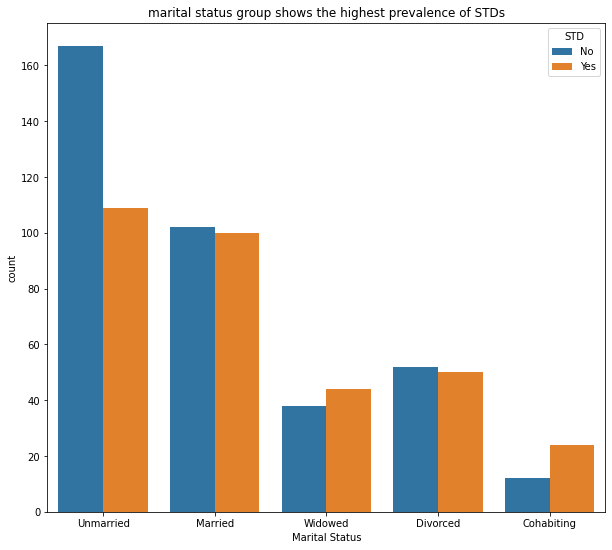

In [46]:
plt.figure(figsize=(10,9))
sns.countplot(data=df, x="Marital Status", hue="STD")
plt.title("marital status group shows the highest prevalence of STDs")

Unmarried people have a high rate of contracting STDs, follwed by Married people. 
While the least rate for contracting STDs is the cohabiting marital status

## 2(b) What is the relationship between marital status and the frequency of HIV testing in the past year?

In [47]:
df.groupby("Marital Status")["HIV TEST IN PAST YEAR"].count()

Marital Status
Cohabiting     36
Divorced      102
Married       202
Unmarried     276
Widowed        82
Name: HIV TEST IN PAST YEAR, dtype: int64

Text(0.5, 1.0, 'the relationship between marital status and the frequency of HIV testing in the past year')

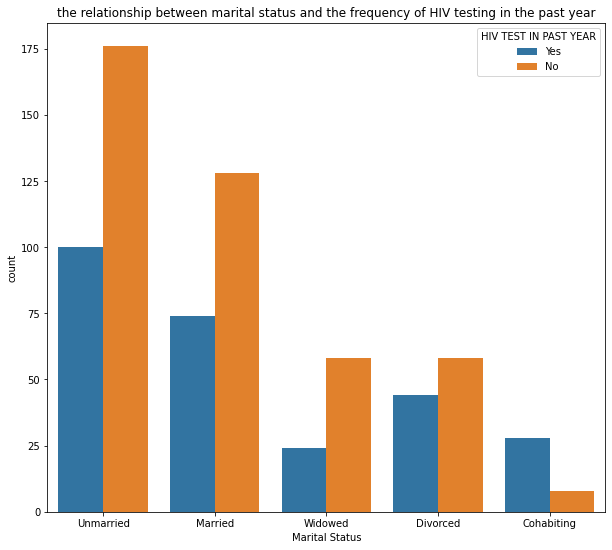

In [48]:
plt.figure(figsize=(10,9))
sns.countplot(data=df, x="Marital Status", hue="HIV TEST IN PAST YEAR")
plt.title("the relationship between marital status and the frequency of HIV testing in the past year")

Unmarried people have the highest population of people who do not do frequent testing in the past year (Unmarried people have the highest numbers for both testing compliance and non-compliance, but the effect of non-compliance outweights compliance) 
while those cohabiting have the least population for those who do no test frequently.

## 3(a) Which STD is most commonly reported among individuals with different educational backgrounds?

In [49]:
df.groupby("Educational Background")["STD"].count()

Educational Background
College Degree        238
Illiteracy            108
Junior High School    136
Primary School         80
Senior High School    136
Name: STD, dtype: int64

from the given data there are no specified list of STDs (Insuffient data), hence it will be difficult to specify among individual.
But we can show the relationship between their educational background and STD

Text(0.5, 1.0, 'relationship between Educational Background and STD')

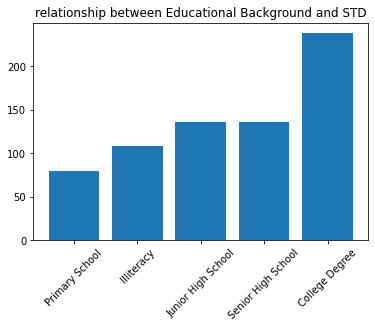

In [50]:
x= df.groupby("Educational Background")["STD"].count().sort_values().index
y= df.groupby("Educational Background")["STD"].count().sort_values().values
plt.bar(x,y)
plt.xticks(rotation=45)
plt.title("relationship between Educational Background and STD")

the population of those with college degrees have a high rate of contracting STDs, while the population of those with primary school certificate have the least populationof contracting STDs.

Text(0.5, 1.0, 'relationship between Educational Background and STD expanded')

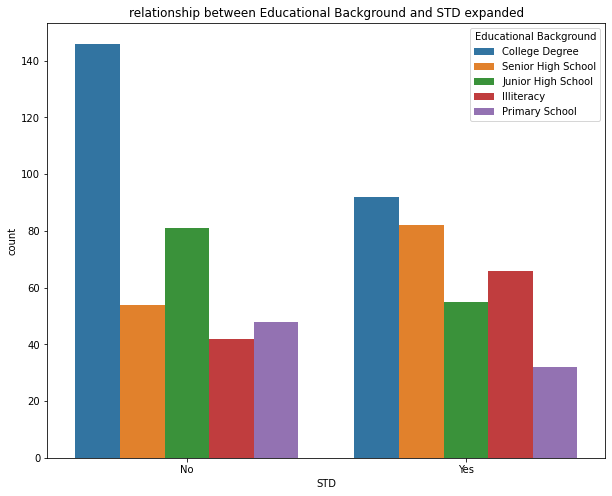

In [51]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x="STD", hue="Educational Background")
plt.title("relationship between Educational Background and STD expanded")

people without college education have a great population of people without STDs(143) when compared to those with college degree(85). 
conversly, the population of illiterates who have STDs are higher than those that do not have it (64 vs 40 respectively).

## 3(b) Is there a significant difference in the prevalence of STDs between different sexual orientations?

In [52]:
sex_orient= df.groupby("SEXUAL ORIENTATION")["STD"].count()
sex_orient

SEXUAL ORIENTATION
Bisexual        150
Heterosexual    374
Homosexual      174
Name: STD, dtype: int64

([<matplotlib.patches.Wedge at 0x1cfba73ed00>,
 [Text(0.8586900814844436, 0.6874964319618246, 'Bisexual'),
  Text(-1.093588617320031, 0.11859146709634254, 'Heterosexual'),
  Text(0.7795658985701304, -0.7760650808962772, 'Homosexual')])

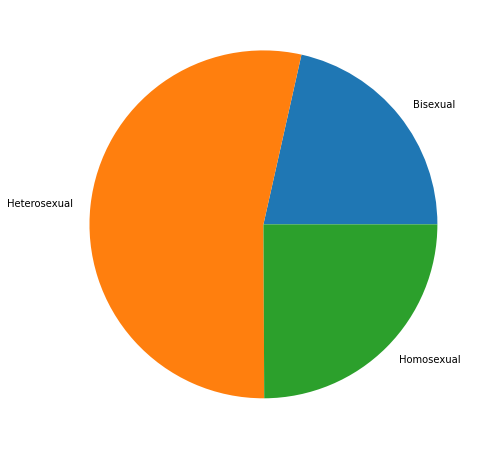

In [53]:
labels= sex_orient.index
x= sex_orient.values
plt.figure(figsize=(10,8))
plt.pie(x, labels=labels)

<AxesSubplot:xlabel='SEXUAL ORIENTATION', ylabel='count'>

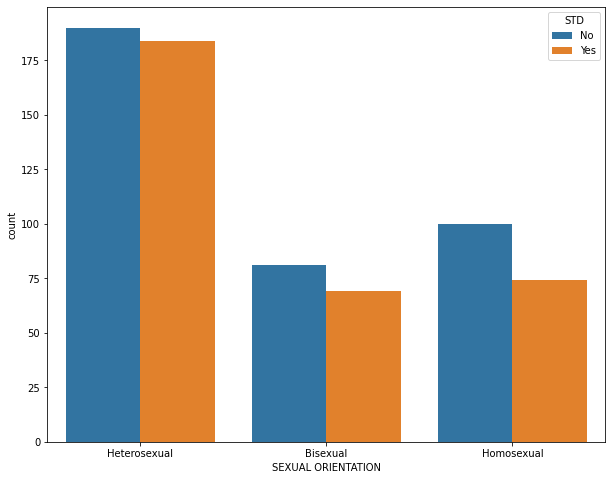

In [54]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x="SEXUAL ORIENTATION", hue="STD")

The Heterosexual sexual orientation have the highest population both for people that have STDs and those who do not have it. 
followed by homosexual. Bisexuals are the least in population.

## 4(a) How does educational background affect the awareness and knowledge of AIDS?

In [55]:
edu_background= df.groupby("Educational Background")["AIDS education"].count().sort_values()
edu_background

Educational Background
Primary School         80
Illiteracy            108
Junior High School    136
Senior High School    136
College Degree        238
Name: AIDS education, dtype: int64

Text(0.5, 1.0, 'How educational background affect the awareness and knowledge of AIDS')

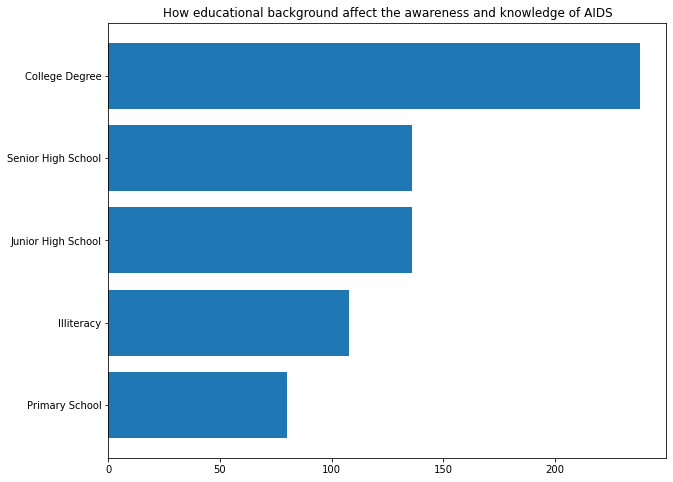

In [56]:
x= edu_background.index
y= edu_background.values
plt.figure(figsize=(10,8))
plt.barh(x,y)
plt.title("How educational background affect the awareness and knowledge of AIDS")

the  chart above shows that educational background affects the awareness of AIDS.
The population of people with college degree have the highest level of awareness 
while the population of people with primary education  have the least level of awareness

## 4(b)What educational background is most associated with drug-taking behaviors?

In [57]:
drug_take_edu= df.groupby("Educational Background")["Drug- taking"].count().sort_values()
drug_take_edu

Educational Background
Primary School         80
Illiteracy            108
Junior High School    136
Senior High School    136
College Degree        238
Name: Drug- taking, dtype: int64

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

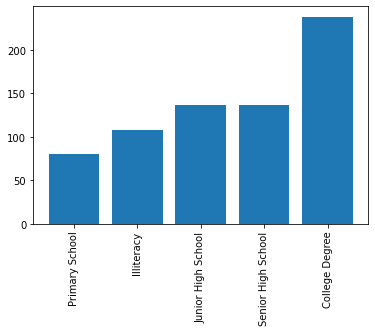

In [58]:
plt.bar(drug_take_edu.index, drug_take_edu.values)
plt.xticks(rotation=90)

Text(0.5, 1.0, 'educational background most associated with drug-taking behaviors')

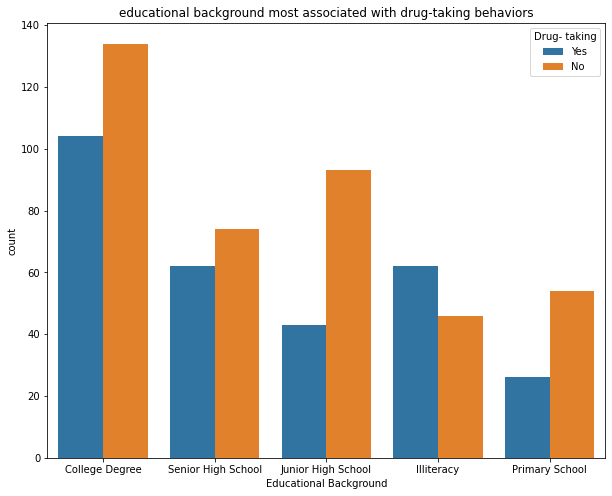

In [59]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x="Educational Background",hue="Drug- taking")
plt.title("educational background most associated with drug-taking behaviors")

Drug-taking is highly prevalent with the college degree population and least with the primary school population, 
yet the people who abstain from drugs is greater than those who indulge in it for all educational background (except for Illiteracy level)

## 5(a) What percentage of individuals tested for HIV in the past year were found to be HIV positive?

In [60]:
df.groupby("Result")["HIV TEST IN PAST YEAR"].count()

Result
Negative    352
Positive    346
Name: HIV TEST IN PAST YEAR, dtype: int64

In [61]:
neg_percent= round((352/698)*100,3)
neg_percent

50.43

In [62]:
pos_percent= round((346/698)*100,3)
pos_percent

49.57

In [63]:
round(neg_percent - pos_percent, 3)

0.86

the percentage difference between those who tested positive and those who tested negative is very slim 0.86%(Approximately 1%), 
those who tested negative is 50.43% while those who tested positive is 49.57%

## 5(b) How does the frequency of HIV testing vary with places of seeking sex partners?

In [64]:
places_sp= df.groupby("Places of seeking sex partners")["HIV TEST IN PAST YEAR"].count().sort_values()
places_sp

Places of seeking sex partners
None            22
Others          74
Park           108
Public bath    144
Bar            150
Internet       200
Name: HIV TEST IN PAST YEAR, dtype: int64

Text(0.5, 1.0, 'How the frequency of HIV testing vary with places of seeking sex partners')

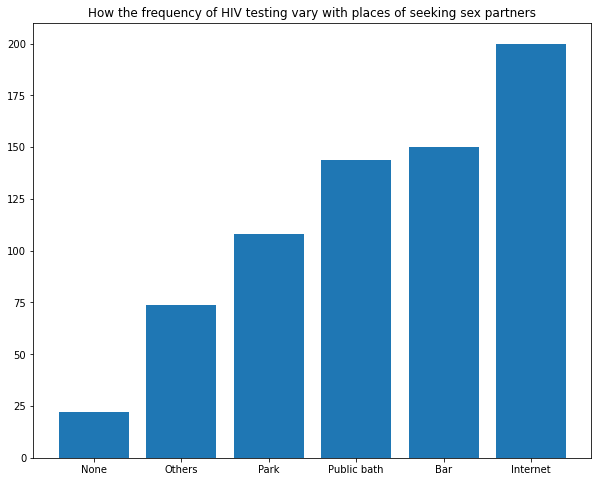

In [65]:
plt.figure(figsize=(10,8))
plt.bar(places_sp.index, places_sp.values)
plt.title("How the frequency of HIV testing vary with places of seeking sex partners")

for those who frequently do the test in the past year, 
their places of seeking for sexual partner is high on the internet followed by bars

## 6. What impact does AIDS education have on the likelihood of individuals seeking HIV testing?

In [66]:
df.groupby("HIV TEST IN PAST YEAR")["AIDS education"].count()

HIV TEST IN PAST YEAR
No     428
Yes    270
Name: AIDS education, dtype: int64

<AxesSubplot:xlabel='HIV TEST IN PAST YEAR', ylabel='count'>

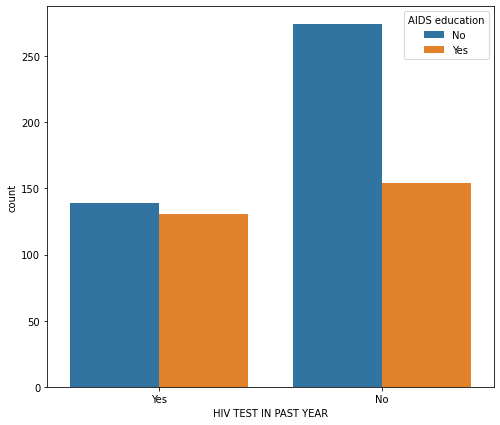

In [67]:
plt.figure(figsize=(8,7))
sns.countplot(data=df, x="HIV TEST IN PAST YEAR", hue="AIDS education")

## 7 What are the most common places of seeking sex partners among individuals who tested positive for STDs?

In [68]:
df.groupby("Places of seeking sex partners")["STD"].count().sort_values()

Places of seeking sex partners
None            22
Others          74
Park           108
Public bath    144
Bar            150
Internet       200
Name: STD, dtype: int64

<AxesSubplot:xlabel='Places of seeking sex partners', ylabel='count'>

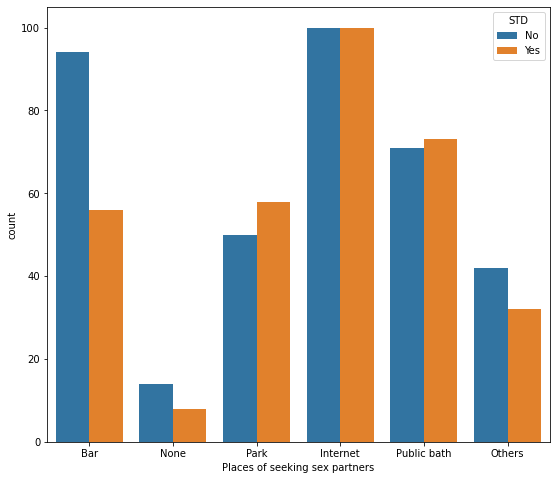

In [69]:
plt.figure(figsize=(9,8))
sns.countplot(data=df, x="Places of seeking sex partners", hue="STD")

The most common place of seeking sexual partneramong individual who tested positive to STDs is over the internet

## 8 What is the distribution of sexual orientations among individuals who received AIDS education?

In [70]:
sex_orient= df.groupby("SEXUAL ORIENTATION")["AIDS education"].count()
sex_orient

SEXUAL ORIENTATION
Bisexual        150
Heterosexual    374
Homosexual      174
Name: AIDS education, dtype: int64

Text(0.5, 1.0, 'distribution of sexual orientations among individuals who received AIDS education')

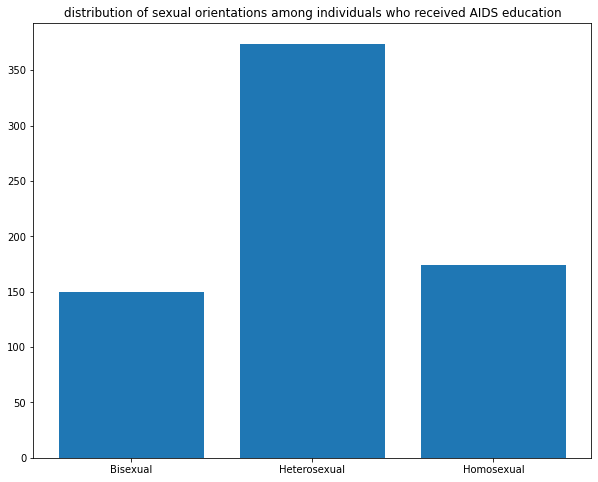

In [71]:
x= sex_orient.index
y= sex_orient.values
plt.figure(figsize=(10,8))
plt.bar(x,y)
plt.title("distribution of sexual orientations among individuals who received AIDS education")

## 9(a) What is the correlation between educational background and HIV status?

In [72]:
hiv_stats =df.groupby("Educational Background")["Result"].count().sort_values(ascending=False)
hiv_stats

Educational Background
College Degree        238
Junior High School    136
Senior High School    136
Illiteracy            108
Primary School         80
Name: Result, dtype: int64

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

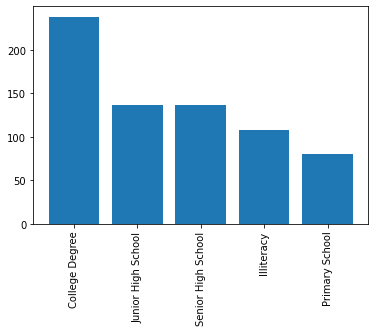

In [73]:

x= hiv_stats.index
y= hiv_stats.values
plt.bar(x,y)
plt.xticks(rotation=90)


([0, 1, 2, 3, 4],
 [Text(0, 0, 'College Degree'),
  Text(1, 0, 'Senior High School'),
  Text(2, 0, 'Junior High School'),
  Text(3, 0, 'Illiteracy'),
  Text(4, 0, 'Primary School')])

<Figure size 720x576 with 0 Axes>

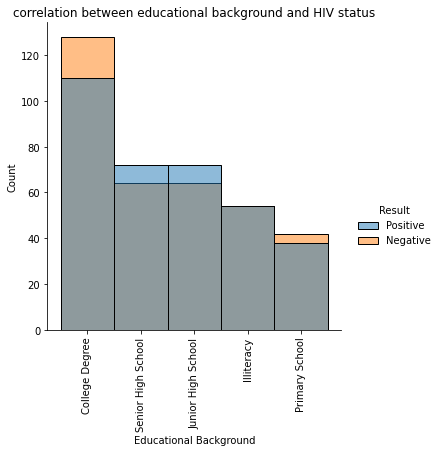

In [74]:
plt.figure(figsize=(10,8))
sns.displot(data=df, x="Educational Background", hue="Result")
plt.title("correlation between educational background and HIV status")
plt.xticks(rotation=90)

## 9(a) What is the correlation between educational background and HIV status?

In [75]:
edu_background= df.groupby("Educational Background")["Result"].count().sort_values(ascending=False)
edu_background

Educational Background
College Degree        238
Junior High School    136
Senior High School    136
Illiteracy            108
Primary School         80
Name: Result, dtype: int64

([<matplotlib.patches.Wedge at 0x1cfbb87e5b0>,
 [Text(0.6706971859176397, 1.2288878243363628, 'College Degree'),
  Text(-1.018619697270729, 0.41522754283897, 'Junior High School'),
  Text(-0.7365340566379703, -0.8170174927211872, 'Senior High School'),
  Text(0.39220114356339036, -1.0277053386003057, 'Illiteracy'),
  Text(1.0294601975772277, -0.3875715438525583, 'Primary School')])

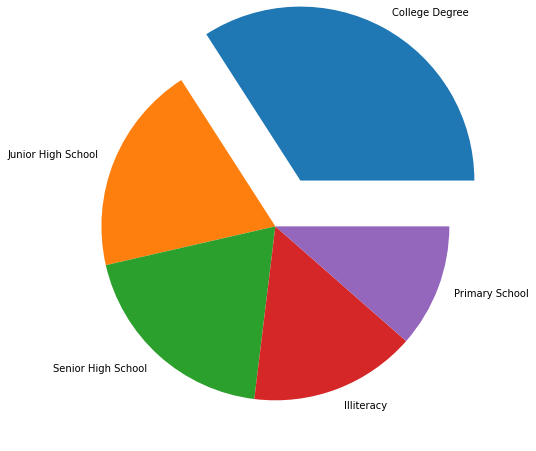

In [76]:
plt.figure(figsize=(10,8))
labels= edu_background.index
x= edu_background.values
plt.pie(x, labels=labels, explode=[0.3,0,0,0,0])

## 9(b) How does marital status affect the outcome of HIV test results?

In [77]:
df.groupby("Marital Status")["Result"].count().sort_values(ascending=False)

Marital Status
Unmarried     276
Married       202
Divorced      102
Widowed        82
Cohabiting     36
Name: Result, dtype: int64

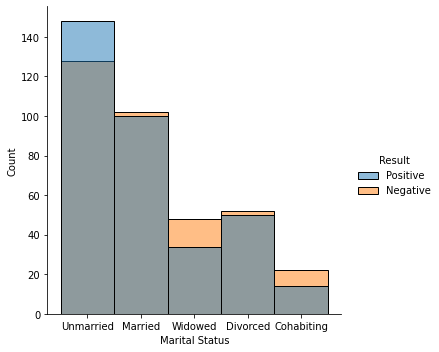

In [78]:
sns.displot(data=df, x="Marital Status", hue="Result")

# HIV Status prediction

In [79]:
#one-hot using get_dummies
data = pd.get_dummies(df)

In [80]:
data

,Age,Marital Status_Cohabiting,Marital Status_Divorced,Marital Status_Married,Marital Status_Unmarried,Marital Status_Widowed,STD_No,STD_Yes,Educational Background_College Degree,Educational Background_Illiteracy,...,Places of seeking sex partners_Others,Places of seeking sex partners_Park,Places of seeking sex partners_Public bath,SEXUAL ORIENTATION_Bisexual,SEXUAL ORIENTATION_Heterosexual,SEXUAL ORIENTATION_Homosexual,Drug- taking_No,Drug- taking_Yes,Result_Negative,Result_Positive
0,22,0,0,0,1,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
1,20,0,0,0,1,0,1,0,1,0,...,0,0,0,0,1,0,1,0,1,0
2,23,0,0,1,0,0,0,1,1,0,...,0,0,0,1,0,0,1,0,1,0
3,24,0,0,1,0,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,1
4,18,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,19,0,0,0,1,0,0,1,0,1,...,0,0,0,0,1,0,1,0,0,1
694,47,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,1,0
695,34,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,1,1,0
696,25,0,0,1,0,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,1


 we will remove columns that will not affect our predictive objective. 
these columns are mostly  alternative of the ones to be used,  (STD_No,Drug-taking_No, Result_Negative)

In [81]:
data.drop(columns=["STD_No","Drug- taking_No","Result_Negative"], inplace=True )

In [82]:
data.head()

,Age,Marital Status_Cohabiting,Marital Status_Divorced,Marital Status_Married,Marital Status_Unmarried,Marital Status_Widowed,STD_Yes,Educational Background_College Degree,Educational Background_Illiteracy,Educational Background_Junior High School,...,Places of seeking sex partners_Internet,Places of seeking sex partners_None,Places of seeking sex partners_Others,Places of seeking sex partners_Park,Places of seeking sex partners_Public bath,SEXUAL ORIENTATION_Bisexual,SEXUAL ORIENTATION_Heterosexual,SEXUAL ORIENTATION_Homosexual,Drug- taking_Yes,Result_Positive
0,22,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,1
1,20,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
2,23,0,0,1,0,0,1,1,0,0,...,0,1,0,0,0,1,0,0,0,0
3,24,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,1
4,18,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,1,0,1,1


In [83]:
#seperate the target from other features
target= data.pop("Result_Positive")

target


0      1
1      0
2      0
3      1
4      1
      ..
693    1
694    0
695    0
696    1
697    1
Name: Result_Positive, Length: 698, dtype: uint8

In [84]:
features = data.values

features

array([[22,  0,  0, ...,  1,  0,  1],
       [20,  0,  0, ...,  1,  0,  0],
       [23,  0,  0, ...,  0,  0,  0],
       ...,
       [34,  0,  0, ...,  0,  1,  1],
       [25,  0,  0, ...,  1,  0,  1],
       [46,  1,  0, ...,  0,  1,  0]], dtype=int64)

In [85]:
#split data into test and train
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(features, target, test_size=0.2, random_state= 4)
#est size 25%(0.2) and trainsize 80%(0.8)

In [86]:
y_train

427    0
178    0
471    1
660    1
194    0
      ..
599    0
360    0
439    1
174    1
122    1
Name: Result_Positive, Length: 558, dtype: uint8

In [87]:
#import the logistic regression model
from sklearn.linear_model import LogisticRegression

In [88]:
logistic_regression= LogisticRegression()

In [89]:
model= logistic_regression.fit(x_train, y_train)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [90]:
y_predict= model.predict(x_test)

y_predict

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1], dtype=uint8)

# Model Evaluation

In [91]:
#Model Evaluation  using confusion matrix
from sklearn.metrics import confusion_matrix, jaccard_score, accuracy_score

In [92]:
confusion_matrix= confusion_matrix(y_test, y_predict)

confusion_matrix

array([[64,  8],
       [16, 52]], dtype=int64)

In [93]:
#check for accuracy score
accuracy_score(y_test,y_predict)

0.8285714285714286

In [94]:
#check jaccard score
jaccard_score(y_test,y_predict)

0.6842105263157895

In [95]:
#visualize the confusion matrix
import matplotlib.pyplot as plt, seaborn as sns

Text(33.0, 0.5, 'true labels')

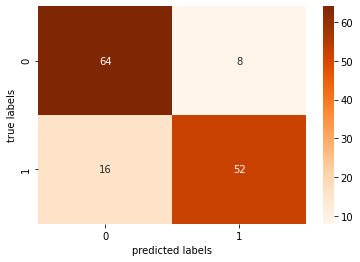

In [96]:
sns.heatmap(confusion_matrix, annot=True, cmap="Oranges")
plt.xlabel("predicted labels" )
plt.ylabel("true labels")